In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
# ===== Data Cleaning =====
# Drop irrelevant columns
cleaned_df = df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

# Drop rows with missing income
cleaned_df = cleaned_df.dropna(subset=['Income'])

# Convert categorical data to numeric using one-hot encoding
cleaned_df = pd.get_dummies(cleaned_df, columns=['Education', 'Marital_Status'], drop_first=True)

cleaned_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,False,False,True,False,False,True,False,False,False,False


In [4]:
# ===== Feature Scaling =====
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# ===== Dimensionality Reduction (PCA) =====
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

In [5]:
# ===== K-Means Clustering =====
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    sse.append(kmeans.inertia_)

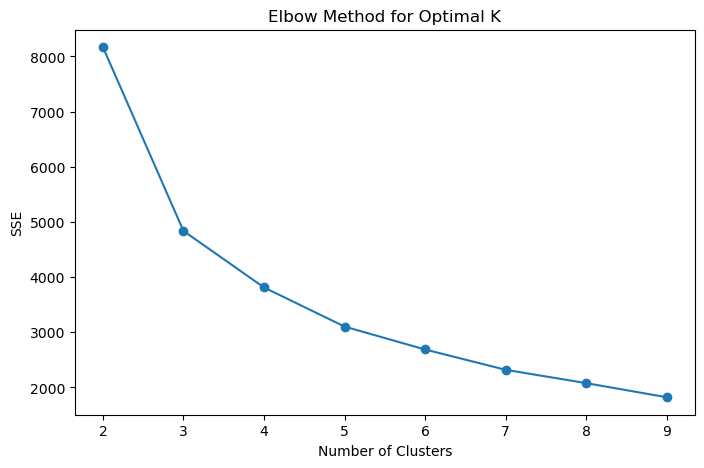

In [6]:
# Elbow Method Visualization
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
# Apply K-Means with Optimal K
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose K=4 for example
kmeans_labels = kmeans.fit_predict(pca_data)

# Silhouette Score
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.3f}')

K-Means Silhouette Score: 0.413


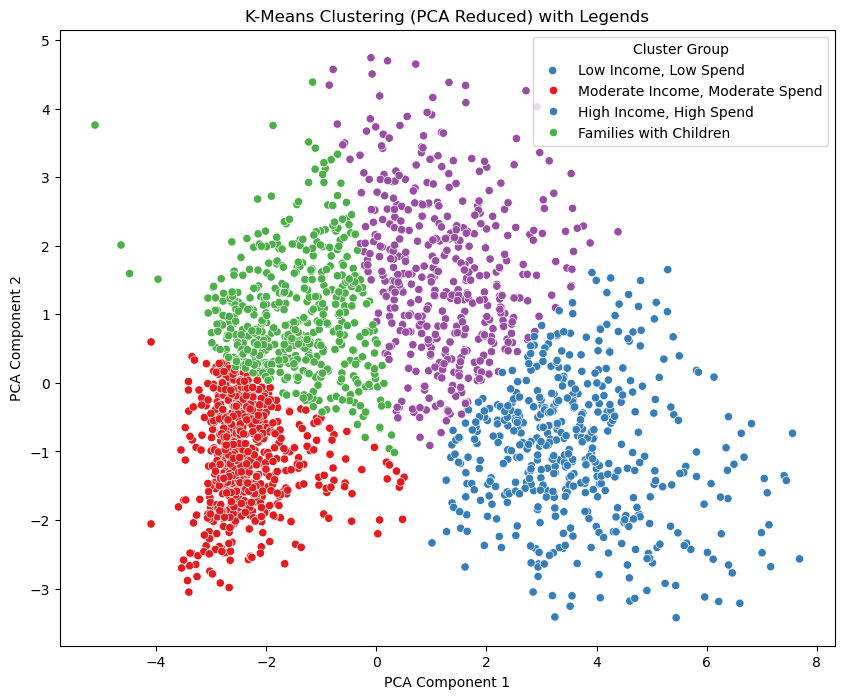

In [29]:
# K-Means Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_data[:, 0], 
    y=pca_data[:, 1], 
    hue=kmeans_labels, 
    palette='Set1', 
    legend='full'
)
plt.title('K-Means Clustering (PCA Reduced) with Legends')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(
    title='Cluster Group', 
    loc='upper right', 
    labels=['Low Income, Low Spend', 
            'Moderate Income, Moderate Spend', 
            'High Income, High Spend', 
            'Families with Children']
)
plt.show()